# scRNA-seq analysis

Here we will use 10X PBMCs scRNA-seq dataset as an example to illustrate how SIMBA performs scRNA-seq analysis

In [1]:
import os
import simba as si
si.__version__

/srv/local/jayoung/conda/envs/jy_simba_copy/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.1'

In [2]:
workdir = 'result_simba_rnaseq'
si.settings.set_workdir(workdir)

Saving results in: result_simba_rnaseq


In [3]:
si.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [4]:
1


1

In [5]:
# make plots prettier
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

/tmp/ipykernel_22958/3704955539.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


### load example data

In [6]:
adata_CG = si.datasets.rna_10xpmbc3k()

In [7]:
adata_CG

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'celltype'
    var: 'gene_ids'

### preprocessing

In [8]:
si.pp.filter_genes(adata_CG,min_n_cells=3)

Before filtering: 
2700 cells, 32738 genes
Filter genes based on min_n_cells
After filtering out low-expressed genes: 
2700 cells, 13714 genes


In [9]:
si.pp.cal_qc_rna(adata_CG)

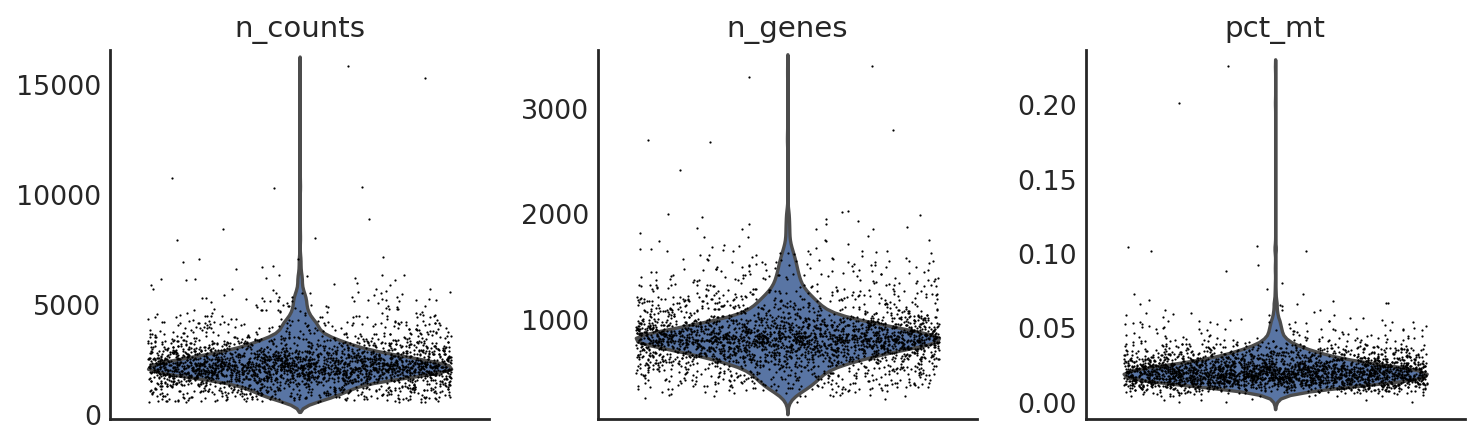

In [10]:
si.pl.violin(adata_CG,list_obs=['n_counts','n_genes','pct_mt'])

Filter out cells if needed:

```python
si.pp.filter_cells_rna(adata,min_n_genes=100)
```

In [11]:
si.pp.normalize(adata_CG,method='lib_size')

In [12]:
si.pp.log_transform(adata_CG)

Optionally, variable gene selection step can be also performed. 

```python
si.pp.select_variable_genes(adata_CG, n_top_genes=2000)
si.pl.variable_genes(adata_CG,show_texts=True)
```

This will speed up the training procedure as only variable genes are encoded into the graph. But we won't obtain the embeddings of non-variable genes.

### discretize RNA expression

In [13]:
si.tl.discretize(adata_CG,n_bins=5)

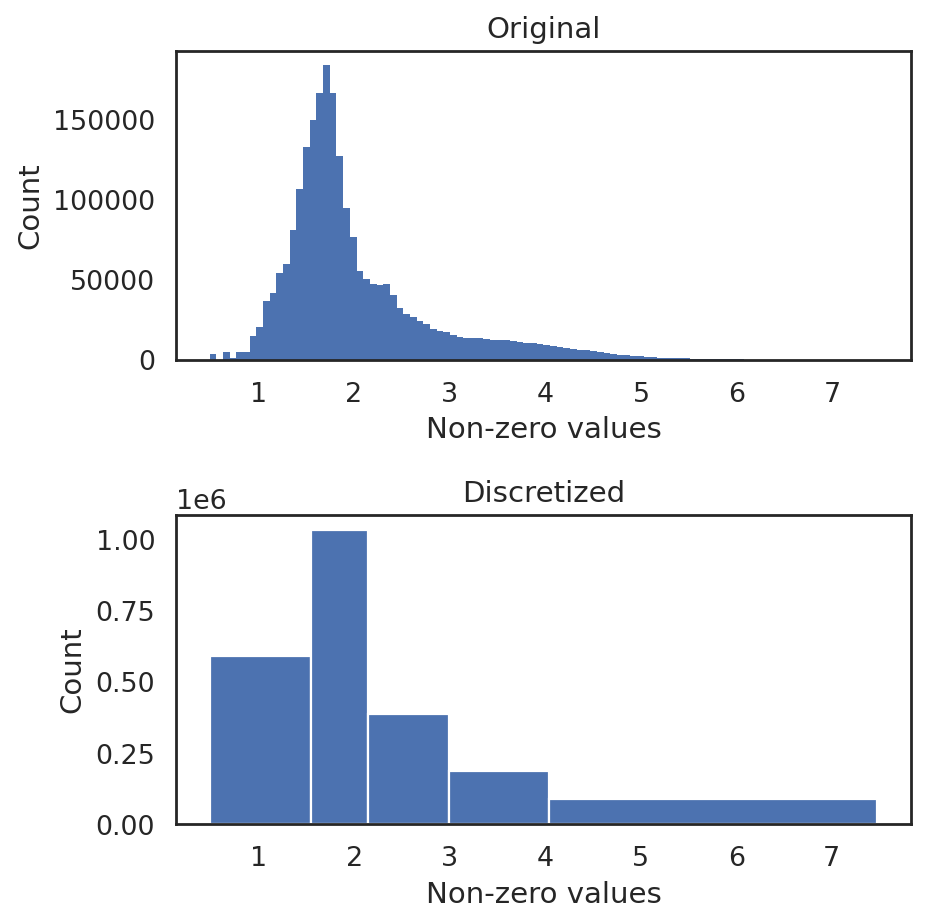

In [14]:
si.pl.discretize(adata_CG,kde=False)

### generate graph

In [15]:
%%time
si.tl.gen_graph(list_CG=[adata_CG],
                copy=False,
                use_highly_variable=False,
                dirname='graph_n',
                get_marker_significance=True,
                fold_null_nodes=5)

/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:269: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_alias = entity_alias.append(dict_df_cells[k],
/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:277: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_alias = entity_alias.append(df_genes,


relation0: source: C, destination: G
#edges: 590134


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation1: source: C, destination: G
#edges: 1034817


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation2: source: C, destination: G
#edges: 384939
relation3: source: C, destination: G
#edges: 185485


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,
/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation4: source: C, destination: G
#edges: 87601
Total number of edges: 2282976
Writing graph file "pbg_graph.txt" to "result_simba_rnaseq/pbg/graph_n" ...


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


Finished.


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:269: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_alias = entity_alias.append(dict_df_cells[k],
/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:277: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_alias = entity_alias.append(df_genes,
/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:285: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  entity_alias = entity_alias.append(df_ngenes,


input graph: (2700, 13714)
relation0: source: C, destination: G
#edges: 590134


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation1: source: nG, destination: C
#edges: 2950670


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:508: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_v,


relation2: source: C, destination: G
#edges: 1034817


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation3: source: nG, destination: C
#edges: 5174085


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:508: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_v,


relation4: source: C, destination: G
#edges: 384939


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation5: source: nG, destination: C
#edges: 1924695


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:508: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_v,


relation6: source: C, destination: G
#edges: 185485


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation7: source: nG, destination: C
#edges: 927425


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:508: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_v,


relation8: source: C, destination: G
#edges: 87601


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:486: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_x,


relation9: source: nG, destination: C
#edges: 438005


/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/tools/_pbg.py:508: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edges = df_edges.append(df_edges_v,


Total number of edges: 13697856
Writing graph file "pbg_graph.txt" to "result_simba_rnaseq/pbg/graph_n_with_sig" ...
Finished.
CPU times: user 52.1 s, sys: 6.66 s, total: 58.7 s
Wall time: 1min


### PBG training

Before PBG training, let's take a look at the parameters:

In [16]:
si.settings.workdir

'result_simba_rnaseq'

In [17]:
si.settings.pbg_params

{'entity_path': 'result_simba_rnaseq/pbg/graph_n/input/entity',
 'edge_paths': ['result_simba_rnaseq/pbg/graph_n/input/edge'],
 'checkpoint_path': '',
 'entities': {'C': {'num_partitions': 1},
  'G': {'num_partitions': 1},
  'nG': {'num_partitions': 1}},
 'relations': [{'name': 'r0',
   'lhs': 'C',
   'rhs': 'G',
   'operator': 'none',
   'weight': 1.0},
  {'name': 'r1', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
  {'name': 'r2', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
  {'name': 'r3', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 4.0},
  {'name': 'r4', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 5.0}],
 'dynamic_relations': False,
 'dimension': 50,
 'global_emb': False,
 'comparator': 'dot',
 'num_epochs': 10,
 'workers': 4,
 'num_batch_negs': 50,
 'num_uniform_negs': 50,
 'loss_fn': 'softmax',
 'lr': 0.1,
 'early_stopping': False,
 'regularization_coef': 0.0,
 'wd': 0.0,
 'wd_interval': 50,
 'eval_fraction': 0.05,
 'eval_num_batc

In [18]:
si.settings.graph_stats

{'graph_n': {'relation0': {'source': 'C',
   'destination': 'G',
   'n_edges': 590134},
  'relation1': {'source': 'C', 'destination': 'G', 'n_edges': 1034817},
  'relation2': {'source': 'C', 'destination': 'G', 'n_edges': 384939},
  'relation3': {'source': 'C', 'destination': 'G', 'n_edges': 185485},
  'relation4': {'source': 'C', 'destination': 'G', 'n_edges': 87601},
  'n_edges': 2282976,
  'entities': {'C': {'num_partitions': 1},
   'G': {'num_partitions': 1},
   'nG': {'num_partitions': 1}},
  'relations': [{'name': 'r0',
    'lhs': 'C',
    'rhs': 'G',
    'operator': 'none',
    'weight': 1.0},
   {'name': 'r1', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 2.0},
   {'name': 'r2', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 3.0},
   {'name': 'r3', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 4.0},
   {'name': 'r4', 'lhs': 'C', 'rhs': 'G', 'operator': 'none', 'weight': 5.0}]},
 'graph_n_with_sig': {'relation0': {'source': 'C',
   'destination': 'G',
   '

If no parameters need to be adjusted, the training can be simply done with:

```python
si.tl.pbg_train(auto_wd=True, save_wd=True, output='model')
```

Here we show how to adjust training-related parameters if needed. In general, weight decay `wd` is the only parameter that might need to be adjusted based on the following pbg metric plots. However, in almost all the cases, the automatically decided `wd` (enabling it by setting `auto_wd=True`) works well.

E.g. we want to change `wd_interval`:

In [19]:
%%time
# modify parameters
dict_config = si.settings.pbg_params.copy()
# dict_config['wd'] = 0.015521 
dict_config['wd_interval'] = 10 # we usually set `wd_interval` to 10 for scRNA-seq datasets for a slower but finer training
dict_config['workers'] = 12 #The number of CPUs.

## start training
si.tl.pbg_train(pbg_params = dict_config, auto_wd=True, save_wd=True, output='model', get_marker_significance=True)

Auto-estimated weight decay is 1.552147E-02
`.settings.pbg_params['wd']` has been updated to 1.552147E-02
Converting input data ...
[2022-11-09 17:40:11.054557] Using the 5 relation types given in the config
[2022-11-09 17:40:11.055204] Searching for the entities in the edge files...
[2022-11-09 17:40:14.636193] Entity type C:
[2022-11-09 17:40:14.637053] - Found 2700 entities
[2022-11-09 17:40:14.637567] - Removing the ones with fewer than 1 occurrences...
[2022-11-09 17:40:14.638483] - Left with 2700 entities
[2022-11-09 17:40:14.638939] - Shuffling them...
[2022-11-09 17:40:14.640943] Entity type G:
[2022-11-09 17:40:14.641379] - Found 13714 entities
[2022-11-09 17:40:14.641766] - Removing the ones with fewer than 1 occurrences...
[2022-11-09 17:40:14.644047] - Left with 13714 entities
[2022-11-09 17:40:14.644427] - Shuffling them...
[2022-11-09 17:40:14.654058] Entity type nG:
[2022-11-09 17:40:14.654507] - Found 0 entities
[2022-11-09 17:40:14.655019] - Removing the ones with fewe

[2022-11-09 17:42:18.315756] - Processed 5200000 edges so far...
[2022-11-09 17:42:18.844168] - Processed 5300000 edges so far...
[2022-11-09 17:42:19.375982] - Processed 5400000 edges so far...
[2022-11-09 17:42:19.950330] - Processed 5500000 edges so far...
[2022-11-09 17:42:20.478942] - Processed 5600000 edges so far...
[2022-11-09 17:42:21.007564] - Processed 5700000 edges so far...
[2022-11-09 17:42:21.535695] - Processed 5800000 edges so far...
[2022-11-09 17:42:22.066773] - Processed 5900000 edges so far...
[2022-11-09 17:42:22.594216] - Processed 6000000 edges so far...
[2022-11-09 17:42:23.127677] - Processed 6100000 edges so far...
[2022-11-09 17:42:23.657535] - Processed 6200000 edges so far...
[2022-11-09 17:42:24.186494] - Processed 6300000 edges so far...
[2022-11-09 17:42:24.717322] - Processed 6400000 edges so far...
[2022-11-09 17:42:25.246803] - Processed 6500000 edges so far...
[2022-11-09 17:42:25.774112] - Processed 6600000 edges so far...
[2022-11-09 17:42:26.3071

> If `wd` is specified by users instead of being automatically decided, then make sure to update it in simba setting:
```python
si.settings.pbg_params = dict_config.copy()
```

The trained result can be loaded in with the following steps:

By default, it's using the current training result stored in `.setting.pbg_params`
```python
# load in graph ('graph0') info
si.load_graph_stats()
# load in model info for ('graph0')
si.load_pbg_config()
```
Users can also specify different pathss
```python
# load in graph ('graph0') info
si.load_graph_stats(path='./result_simba_rnaseq/pbg/graph0/')
# load in model info for ('graph0')
si.load_pbg_config(path='./result_simba_rnaseq/pbg/graph0/model/')
```

plotting training metrics to make sure the model is not overfitting

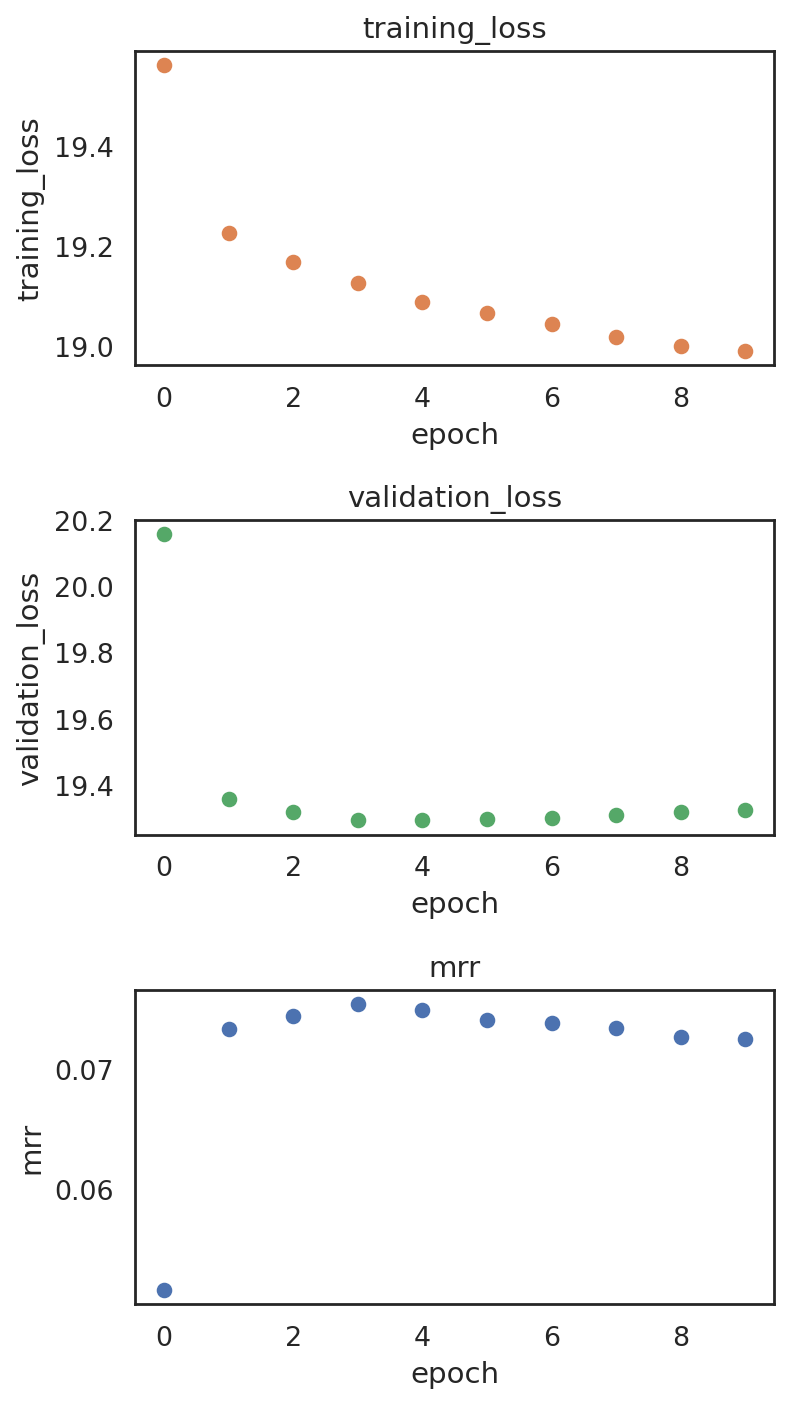

In [20]:
si.pl.pbg_metrics(fig_ncol=1)

### post-training analysis

In [21]:
palette_celltype={'B':'#1f77b4',
                  'CD4 T':'#ff7f0e', 
                  'CD8 T':'#279e68',
                  'Dendritic':"#aa40fc",
                  'CD14 Monocytes':'#d62728',
                  'FCGR3A Monocytes':'#b5bd61',
                  'Megakaryocytes':'#e377c2',
                  'NK':'#8c564b'}

In [22]:
%%time
dict_adata = si.read_embedding(get_marker_significance=True)


Null feature nodes for entity C not embedded.
CPU times: user 291 ms, sys: 20.7 ms, total: 312 ms
Wall time: 316 ms


In [23]:
dict_adata

{'C': AnnData object with n_obs × n_vars = 2700 × 50,
 'G': AnnData object with n_obs × n_vars = 13714 × 50,
 'nG': AnnData object with n_obs × n_vars = 68570 × 50}

In [24]:
adata_C = dict_adata['C']  # embeddings for cells
adata_G = dict_adata['G']  # embeddings for genes
adata_nG = dict_adata['nG'] # embeddings for null genes

In [25]:
adata_C

AnnData object with n_obs × n_vars = 2700 × 50

In [26]:
adata_G

AnnData object with n_obs × n_vars = 13714 × 50

In [27]:
adata_nG


AnnData object with n_obs × n_vars = 68570 × 50

SIMBA metrics

In [28]:
marker_genes = ['IL7R', 'CD79A', 'MS4A1', 'CD8A', 'CD8B', 'LYZ', 'CD14',
                'LGALS3', 'S100A8', 'GNLY', 'NKG7', 'KLRB1',
                'FCGR3A', 'MS4A7', 'FCER1A', 'CST3', 'PPBP']

In [29]:
%%time
adata_cmp = si.tl.compare_entities(adata_ref=adata_C, adata_query=adata_G, adata_query_null=adata_nG, )

CPU times: user 1min 19s, sys: 7.89 s, total: 1min 27s
Wall time: 1min 27s


In [30]:
adata_cmp

AnnData object with n_obs × n_vars = 2700 × 13714
    var: 'max', 'maxmin', 'std', 'gini', 'entropy', 'max_fdr', 'std_fdr', 'gini_fdr', 'entropy_fdr'
    layers: 'norm', 'softmax'

In [31]:
adata_cmp.var


,max,maxmin,std,gini,entropy,max_fdr,std_fdr,gini_fdr,entropy_fdr
CISD1,0.634010,1.352598,0.277270,0.155168,7.862967,0.153203,0.213322,0.185564,1.000000
MTMR14,0.709151,1.315612,0.302563,0.175273,7.852508,0.123716,0.178034,0.136912,1.000000
HNRNPH3,0.671094,1.710515,0.345770,0.182111,7.848146,0.138269,0.141848,0.126098,1.000000
GPR124,0.233628,0.354452,0.063661,0.034005,7.898830,0.902189,0.995218,0.998347,0.972361
PRPF4B,0.660065,1.229376,0.243437,0.138963,7.868421,0.142163,0.254105,0.222452,1.000000
...,...,...,...,...,...,...,...,...,...
RP1-43E13.2,0.234505,0.407606,0.073033,0.039409,7.898201,0.902189,0.995218,0.998347,0.993883
FLT3LG,1.086539,2.839808,0.819531,0.393392,7.647254,0.001048,0.000000,0.000000,1.000000
APOBEC3C,0.784308,1.371075,0.283097,0.164524,7.855330,0.092731,0.205001,0.161455,1.000000
CCND2,0.926399,2.106402,0.535175,0.277774,7.777956,0.013076,0.001271,0.001277,1.000000


In [32]:
import importlib
importlib.reload(si)


<module 'simba' from '/data/pinello/PROJECTS/2021_01_JY_SIMBA/simba/simba/__init__.py'>

In [33]:
si.settings.pbg_params['entity_path']


'result_simba_rnaseq/pbg/graph_n/input/entity'

In [34]:
import os


In [35]:
pbg_params = si.settings.pbg_params.copy()


In [36]:
from pathlib import Path

filepath = Path(pbg_params['entity_path']).parent.parent.as_posix()

In [37]:
filepath

'result_simba_rnaseq/pbg/graph_n'

In [38]:
#path_emb
si.settings.pbg_params['checkpoint_path']

'result_simba_rnaseq/pbg/graph_n/model'

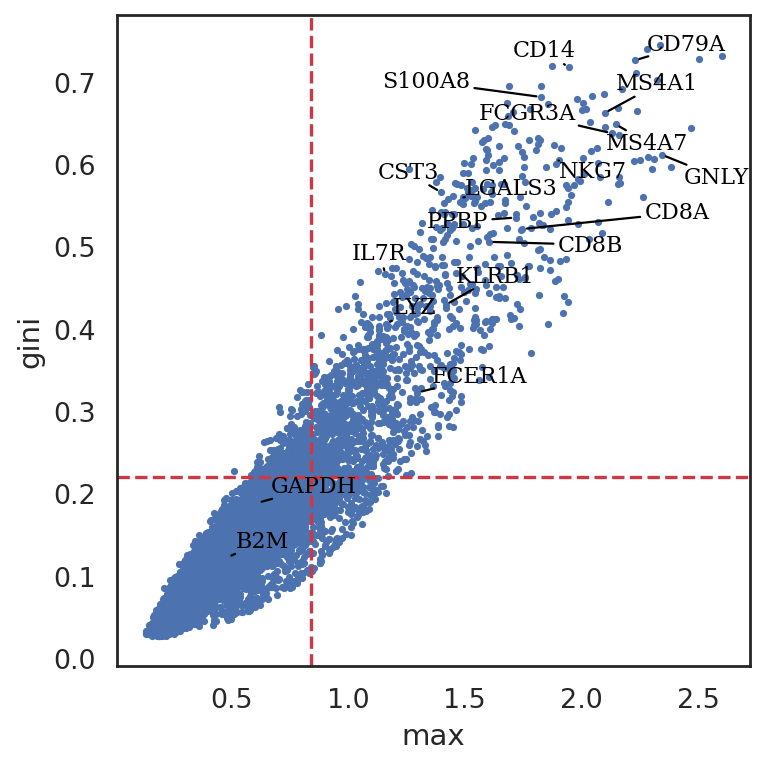

In [48]:
si.pl.entity_metrics(adata_cmp,
                     x='max',
                     y='gini',
                     show_contour=False,
                     texts=marker_genes + ['GAPDH', 'B2M'],
                     show_texts=True,
                     show_cutoff=True,
                     size=5,
                     text_expand=(1.3,1.5),
                     cutoff_fdr=0.05,
                     #color_by_fdr='gini',
                     save_fig=False)

### save results

In [53]:
adata_CG.write(os.path.join(workdir, 'adata_CG_sig.h5ad'))
adata_C.write(os.path.join(workdir, 'adata_C_sig.h5ad'))
adata_G.write(os.path.join(workdir, 'adata_G_sig.h5ad'))
#adata_all.write(os.path.join(workdir, 'adata_all_sig.h5ad'))
adata_cmp.write(os.path.join(workdir, 'adata_cmp_sig.h5ad'))

Read back anndata objects
```python
adata_CG = si.read_h5ad(os.path.join(workdir, 'adata_CG.h5ad'))
adata_C = si.read_h5ad(os.path.join(workdir, 'adata_C.h5ad'))
adata_G = si.read_h5ad(os.path.join(workdir, 'adata_G.h5ad'))
adata_all = si.read_h5ad(os.path.join(workdir, 'adata_all.h5ad'))
adata_cmp = si.read_h5ad(os.path.join(workdir, 'adata_cmp.h5ad'))
```